# Functions for plotting for all datasets

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# pd.options.display.max_columns = 55
# pd.set_option('display.max_rows', 999)

In [42]:
import os
data = os.listdir('../data')

In [43]:
new_list = []

for strg in data:
    if not strg.find('10^') == -1:
        new_list.append(strg)
new_list

['bubble_sort_n10^4.pkl',
 'combined_sort_n10^6.pkl',
 'insertion_sort_n10^4.pkl',
 'insertion_sort_n10^5.pkl',
 'insertion_sort_n10^8.pkl',
 'merge_sort_n10^6.pkl',
 'quick_sort_n10^6.pkl',
 'sorted_n10^6.pkl',
 'sorted_n10^8.pkl',
 'sort_n10^6.pkl',
 'sort_n10^8.pkl']

In [44]:
data_order_1 = '10^8'
data_order_2 = '10^6'
data_order_3 = '10^5'
data_order_4 = '10^4'
data_order = '2^16'

In [45]:
df_insertion = pd.read_pickle(r"..\data\insertion_sort_n" + data_order + ".pkl")
df_bubble = pd.read_pickle(r"..\data\bubble_sort_n" + data_order + ".pkl")
df_merge = pd.read_pickle(r"..\data\merge_sort_n" + data_order + ".pkl")
df_quick = pd.read_pickle(r"..\data\quick_sort_n" + data_order + ".pkl")
df_combined = pd.read_pickle(r"..\data\combined_sort_n" + data_order + ".pkl")
df_python_sort = pd.read_pickle(r"..\data\sorted_n" + data_order + ".pkl")
df_np_sort = pd.read_pickle(r"..\data\sort_n" + data_order + ".pkl")

In [46]:
frames = [df_insertion, df_bubble, df_merge, df_quick, df_combined, df_python_sort, df_np_sort]

# Concatenating all benchmarking dataframes into one
df_all_frames = pd.concat(frames, axis=0, ignore_index=True)

In [47]:
df_all_frames.shape

(1735, 5)

In [48]:
# Renaimg a couple of column titles to nice names for title in Plots
df_all_frames.rename(columns= {'sorting algorithm' : 'Sorting Algorithm', 'time': 'Time' }, inplace= True)
df_all_frames.head(1)

,input order,input size,run number,Sorting Algorithm,Time
0,sorted,1,1,insertion_sort,0.000001


In [49]:
# Replacing Algorithm names to nice names for Legend in Plots

sorting_algorithm = {
    'Insertion Sort': 'insertion_sort',
    'Bubble Sort': 'bubble_sort',
    'Merge Sort': 'merge_sort',
    'Quick Sort': 'quick_sort',
    'Combined Sort': 'combined_sort',
    'Python Built-in Sort': 'sorted',
    'NumPy Sort': 'sort'
}
input_ordering = {
    'Sorted Data': 'sorted',
    'Reverse Sorted Data': 'reversed',
    'Random Data': 'random',
#     'Identical Data': 'identical'
}

for title, listed in sorting_algorithm.items():
    df_all_frames['Sorting Algorithm'] = df_all_frames[
        'Sorting Algorithm'].str.replace(listed, title)

for title, listed in input_ordering.items():
    df_all_frames['input order'] = df_all_frames['input order'].str.replace(
        listed, title)

df_all_frames.head(1)

,input order,input size,run number,Sorting Algorithm,Time
0,Sorted Data,1,1,Insertion Sort,0.000001


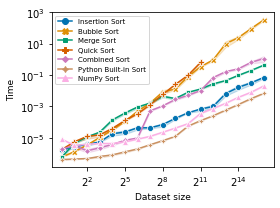

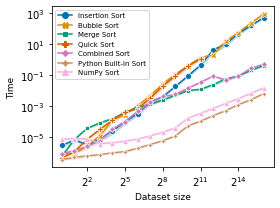

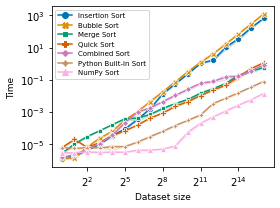

In [145]:
# Plot Categories
input_ordering = {
    'Sorted Data': 'sorted',
    'Reverse Sorted Data': 'reversed',
    'Random Data': 'random',
    #     'Identical Data': 'identical'
}

labels_size = '9'
title_size = '11'
legend_size = '7'

for title, order in input_ordering.items():
    df_order_temp = df_all_frames[df_all_frames["input order"] == title]
    plt.figure(figsize=(4, 3))
    
    # Using Colorblind palette for colors being used in plots
    sns.set_palette(sns.color_palette("colorblind"))
    fig = sns.lineplot(x="input size",
                       y='Time',
                       hue="Sorting Algorithm",
                       style="Sorting Algorithm",
                       markers=True,
                       dashes=False,
                       data=df_order_temp)
#     plt.title(title, fontsize=title_size)
    plt.xlabel('Dataset size', fontsize=labels_size)
    plt.ylabel('Time', fontsize=labels_size)
    plt.legend(fontsize=legend_size, loc=2)
    plt.grid(False)
    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.tight_layout()
    fig = fig.get_figure()
    fig.savefig('plots/' + title + '.pdf')
    plt.show()

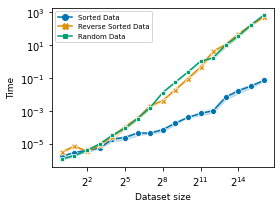

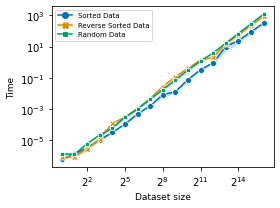

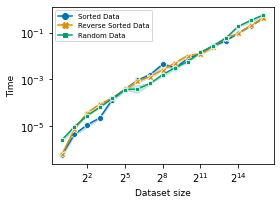

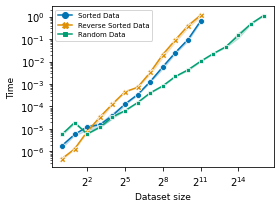

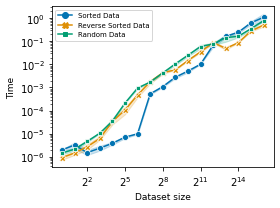

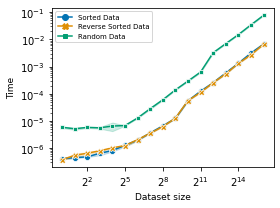

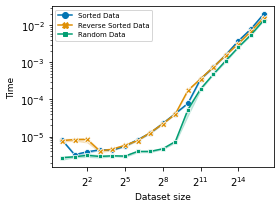

In [144]:
# Plot Categories
sorting_algorithm = {
    'Insertion Sort': 'insertion_sort',
    'Bubble Sort': 'bubble_sort',
    'Merge Sort': 'merge_sort',
    'Quick Sort': 'quick_sort',
    'Combined Sort': 'combined_sort',
    'Python Built-in Sort': 'sorted',
    'NumPy Sort': 'sort'
}

labels_size = '9'
title_size = '11'
legend_size = '7'

for title, sort_func in sorting_algorithm.items():
    df_order_temp = df_all_frames[df_all_frames["Sorting Algorithm"] == title]
    plt.figure(figsize=(4, 3))

    # Using Colorblind palette for colors being used in plots
    sns.set_palette(sns.color_palette("colorblind"))
    fig = sns.lineplot(x="input size",
                       y='Time',
                       hue="input order",
                       style="input order",
                       markers=True,
                       dashes=False,
                       data=df_order_temp)
#     plt.title(title, fontsize=title_size)
    plt.xlabel('Dataset size', fontsize=labels_size)
    plt.ylabel('Time', fontsize=labels_size)
    plt.legend(fontsize=legend_size, loc=2)
    plt.grid(False)
    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.tight_layout()
    fig = fig.get_figure()
    fig.savefig('plots/' + title + '.pdf')
    plt.show()